In [ ]:
#VIDEO 17 - CREAR UN ÁRBOL DE DECISIÓN CON DATASET TITANIC
import pandas as pd               #Pandas se usa mucho con datasets en csv
import matplotlib.pyplot as plt   #Para mostrarlo visualmente
import seaborn as sns             #Seaborn es una librería para algunas visualizaciones
import re                         
import numpy as np                #Para dividir la información en arreglos. Numpy es muy bueno con arreglos.
from sklearn import tree          #Importa el árbol de sklearn
from sklearn.model_selection import train_test_split #El model selection tiene una sección que es el train test split que es el que permite generar los datos de entrenamiento y prueba

%matplotlib inline
sns.set 

<function seaborn.rcmod.set>

In [ ]:
#Asignar variables:
test_df=pd.read_csv('test Titanic.csv')   #Le decimos a pandas que mande a traer la función para los datasets 
train_df=pd.read_csv('train Titanic.csv') #Están divididos en dos archivos, ya no mediante split porque es un dataset muy grande
train_df.head()                           #Para que muestre algunos datos del train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info() #Para saber qué datos tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


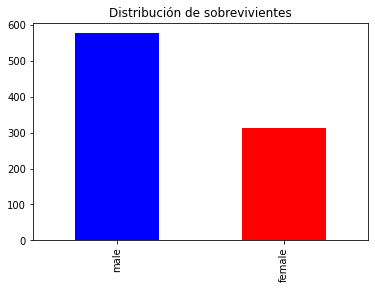

In [ ]:
#Para obtener un dato en particular, como el sexo:
train_df.Sex.value_counts().plot(kind= 'bar', color=['b','r']) #Trae la info del train, la plotea, le dice que sea un gráfico de barras y le pone color
plt.title('Distribución de sobrevivientes')                    #Pone el título
plt.show()                                                     #Plotea

In [ ]:
#VIDEO 18 - CREANDO UN CLASIFICADOR CON SCIKIT LEARN
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

encoder_sex=label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Rellena los nulos existentes:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked']=train_df['Embarked'].fillna('S')

In [ ]:
#Elimina los atributos que no son útiles:
train_predictors=train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1) #drop es la función para eliminar los atributos

#Crea una variable con datos categóricos:
categorical_cols=[cname for cname in train_predictors.columns if #Recorre la info de cname, se sitúa en las columnas. El if tiene dos condiciones:
                  train_predictors [cname].nunique()<10 and      #Condición de que sea un dato único menor a 10
                  train_predictors[cname].dtype=='object'        #Condición de que sea un tipo de dato objeto
                  ]

In [ ]:
#Crea una variable con datos numéricos:
numerical_cols=[cname for cname in train_predictors.columns if        #Vuelve a recorrer el cname pero ahora solo interesan los números.
                train_predictors[cname].dtype in ['int64', 'float64'] #Le dice que si un dato es entero o decimal lo asigne a la variable. 
                ]

In [ ]:
#Une ambas variables (categórica y numérica) en una:
my_cols=categorical_cols+numerical_cols
train_predictors=train_predictors[my_cols]

In [ ]:
#Crea un dummy de información:
dummy_encoded_train_predictors=pd.get_dummies(train_predictors)

In [ ]:
#Para obtener las clases de este entrenamiento, cómo lo dividió:
train_df['Pclass'].value_counts() #Arroja que es de tipo entero

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
#VIDEO 19 - ENTRENAMIENTO DEL MODELO DE CLASIFICACIÓN 
#Continúa con la división de datos:
y_target=train_df['Survived'].values                  #Obtiene los valores del survived. Target es la variable predictora
x_features_one=dummy_encoded_train_predictors.values  #Los datos con los que vamos a trabajar

In [ ]:
#División de la información:
x_train, x_validation, y_train, y_validation=train_test_split(x_features_one,y_target, test_size= .25, random_state=1)

In [ ]:
#Creamos el árbol:
tree_one=tree.DecisionTreeClassifier()
tree_one=tree_one.fit(x_features_one,y_target)

In [ ]:
#Validarlo, ver qué tan cercana a 100 es la predicción:
tree_one_accuracy=round(tree_one.score(x_features_one,y_target), 4)
print('Acuraccy:%0.4f'%(tree_one_accuracy))

Acuraccy:0.9798


In [ ]:
print("Accuracy:", tree_one.score (x_features_one, y_target)) #Este lo ideé yo 

Accuracy: 0.9797979797979798


In [ ]:
#VIDEO 20 - Visualización del árbol de decisión
from io import StringIO
from IPython.display import Image, display
import pydotplus

out=StringIO()
tree.export_graphviz(tree_one,out_file=out)

graph=pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True